In [ ]:
import os
import sys
# https://discuss.pytorch.org/t/how-to-change-the-default-device-of-gpu-device-ids-0/1041/24
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]=f"{0}"

import torch
print(f"current_device:{torch.cuda.current_device()}")
print(f"device_count:{torch.cuda.device_count()}")

sys.path.append("D:\\repo\\FlexipodFast\\src\\py_src\pytorch_sac")
from agent.actor import DiagGaussianActor
from agent.critic import DoubleQCritic
import numpy as np
import torch

sys.path.append("D:\\repo\\FlexipodFast\\src\\py_src")
from flexipod_env import FlexipodEnv

%load_ext line_profiler

device = "cuda"

In [36]:
from hydra import compose, initialize, initialize_config_dir, initialize_config_module
from hydra.core.global_hydra import GlobalHydra
from pathlib import Path
import hydra

GlobalHydra.instance().clear()
hydra.initialize(config_path=".")
cfg = compose("train.yaml")

cfg.agent.obs_dim = 960
cfg.agent.action_dim=12
actor_cfg = cfg.agent.actor_cfg
critic_cfg = cfg.agent.critic_cfg

critic = hydra.utils.instantiate(critic_cfg).to(device)
actor = hydra.utils.instantiate(actor_cfg).to(device)

In [53]:
log_alpha = torch.tensor(np.log(4),device="cpu",requires_grad=True)


In [66]:
torch.save({
    "log_alpha":log_alpha,
    "actor":actor.state_dict(),

},"./tmp.checkpoint")

In [59]:
d = torch.load("./tmp.checkpoint",map_location=device)
log_alpha = d["log_alpha"]
actor.load_state_dict(d["actor"])
log_alpha

tensor(1.3863, device='cuda:0', dtype=torch.float64, requires_grad=True)

In [62]:
next(actor.parameters()).is_cuda

True

In [64]:
os.path.join("./","m","p","q")

'./m\\p\\q'

In [56]:
d = torch.load("./tmp.checkpoint")

In [3]:
# actor = DiagGaussianActor(obs_dim=960,
#                           action_dim = 12,
#                           hidden_dim = 256,
#                           hidden_depth = 8,
#                           log_std_bounds=[-5, 2]
#                          ).to(device)

actor_cfg = dict(actor_cfg)

actor = DiagGaussianActor(obs_dim=actor_cfg["obs_dim"],
                          action_dim = actor_cfg["action_dim"],
                          hidden_dim = actor_cfg["hidden_dim"],
                          hidden_depth = actor_cfg["hidden_depth"],
                          log_std_bounds= actor_cfg["log_std_bounds"]
                         ).to(device)

In [1]:
from flexipod_env import FlexipodEnv
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'
%load_ext line_profiler

env = FlexipodEnv()
# _ = env.reset()
# obs,_,_,_ = env.step(env.action_space.sample())

In [2]:
        # com_vel_xy = np.stack([msg_i[self.ID_com_vel][:2] for msg_i in msg_rec])
        # com_vel_xy = np.linalg.norm(com_vel_xy.mean(axis=0))

In [2]:
self = env
msg_rec = self.receive()
_ = self._processRecMsg(msg_rec)

0.046728480607271194


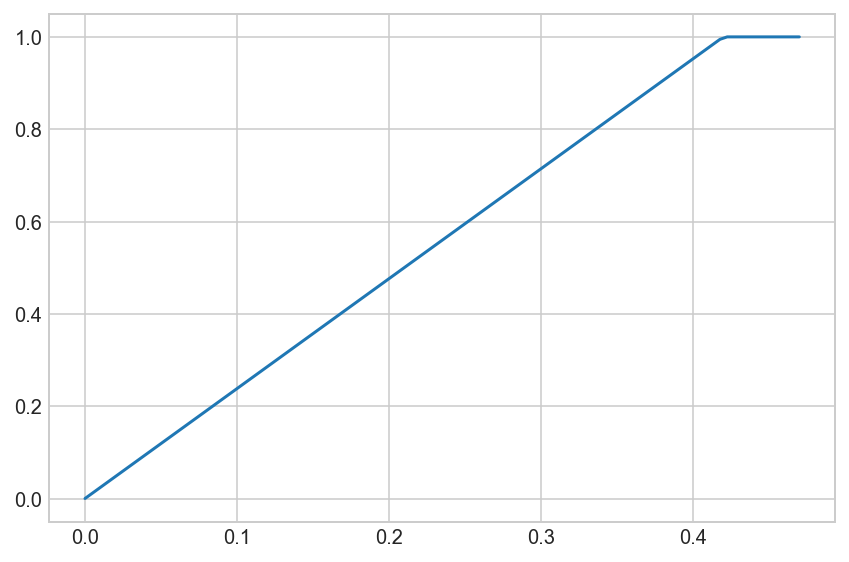

In [48]:
x = np.linspace(-0,0.47,100)
y = np.clip((x/0.42),0,1)
# y = np.tanh(x/0.2)*1.0183
# y = np.sin(x/0.3)
plt.plot(x,y)
# plt.axis("equal")
plt.tight_layout()

In [4]:
_ = self._processRecMsg(msg_rec)

NameError: name 'a' is not defined

In [4]:
%timeit _ = self._processRecMsg(msg_rec)

280 µs ± 2.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%lprun -f self._processRecMsg _ = self._processRecMsg(msg_rec)

In [43]:
msg_rec_i = msg_rec[0]
joint_pos = msg_rec_i[self.ID['joint_pos']]

self_joint_pos = np.empty(12,dtype=np.float32)

_ = np.arctan2(joint_pos[1::2],joint_pos[::2],self_joint_pos,dtype=np.float32)

array([0.65465456, 0.98671997, 0.93688715, 0.4621514 , 0.99243414,
       0.93802893, 0.8085642 , 0.3257212 , 0.95254135, 0.5133601 ,
       0.50434786, 0.01322799], dtype=float32)

In [6]:
%timeit _ = np.arange(1e6)

3.36 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit _ = np.random.randint(0,1e6,1024)

21.5 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
full = True
select_range = 10
if full:
    if idx+1< select_range: # need to select from right also
    

dtype('float32')

In [19]:
env.step(env.action_space.sample())

(array([ 4.54977751e-01,  8.90502810e-01, -9.09633785e-02, -9.95854259e-01,
         8.60904574e-01, -5.08766413e-01,  7.41210341e-01,  6.71272814e-01,
         4.24400955e-01,  9.05474365e-01,  9.99591231e-01, -2.85901055e-02,
         2.89375901e-01,  9.57215548e-01, -1.41832083e-02, -9.99899387e-01,
         9.30818975e-01,  3.65480572e-01,  8.90833914e-01, -4.54329103e-01,
         9.67871070e-01,  2.51446992e-01,  9.58056033e-01,  2.86580980e-01,
        -4.61124163e-03,  5.21685462e-04,  2.18989467e-03, -5.20985154e-03,
         1.33522612e-04,  1.34632364e-03,  5.03554614e-03, -7.48257479e-03,
        -1.54954370e-03,  1.61886797e-03,  5.45096467e-04,  8.77756625e-04,
         6.69127032e-02,  5.43514751e-02, -3.47003266e-02,  1.74116734e-02,
        -5.88905178e-02, -5.15159639e-03, -6.99673891e-02,  2.78999377e-02,
        -7.57293999e-02, -4.89420220e-02,  4.52322736e-02,  6.18285164e-02,
        -8.20360363e-01, -2.29945675e-01, -5.23577929e-01, -4.85838592e-01,
         7.6

In [2]:
import time
cmd_action = np.zeros(12)
self = env
step_cmd_b = self.packer.pack([self.UDP_MOTOR_POS_COMMEND,time.time(),cmd_action.tolist()])
self.send_sock.sendto(step_cmd_b,self.remote_address)

68

In [21]:
import time

step_dt = 1/200.
t = time.time()
for k in range(2000):
    while(time.time()-t<step_dt):
        continue
    t = time.time()
    env.step(np.ones(12))
#     time.sleep(1/400)
    

In [5]:
def test():
    action = env.action_space.sample()
    obs,_,_,_ = env.step(action)
    obs = torch.tensor(obs, dtype=torch.float, device=device).unsqueeze(0)
    dist = actor(obs)
    action = dist.sample()
    action = action.clamp(-1,1)
    assert action.ndim == 2 and action.shape[0]==1
    return action[0].detach().cpu().numpy()

def testMulti(n=10000):
    for k in range(n):
        test()

In [5]:
%timeit test()

3.58 ms ± 535 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%lprun -f test testMulti()

In [ ]:
testMulti()

receive(): try #0:timed out
receive(): try #1:timed out


In [1]:
import numpy as np

In [18]:
def multidimensionalShifting(num_samples, sample_size, elements, probabilities):
    # replicate probabilities as many times as `num_samples`
    replicated_probabilities = np.tile(probabilities, (num_samples, 1))
    # get random shifting numbers & scale them correctly
    random_shifts = np.random.random(replicated_probabilities.shape)
    random_shifts /= random_shifts.sum(axis=1)[:, np.newaxis]
    # shift by numbers & find largest (by finding the smallest of the negative)
    shifted_probabilities = random_shifts - replicated_probabilities
    return np.argpartition(shifted_probabilities, sample_size, axis=1)[:, :sample_size]

In [26]:
a = np.arange(1e6)
p = np.random.random_sample(len(a))

In [39]:
_=multidimensionalShifting(1,5,a,p)

In [41]:
p = p / np.sum(p)


array([ 69755., 272262., 640836., 889723., 569118.])

In [43]:
_ = np.random.choice(a,5,True,p)

In [25]:
from notify_run import Notify
import socket
#change this to your endpoint using notify.register()
notify = Notify(endpoint="https://notify.run/KsGmtWvEwjSROQ8I")
#https://github.com/notify-run/notify.run/blob/master/py_client/README.rst

In [26]:
notify.send(f"{socket.gethostname()} done")

In [17]:
notify.register()

Endpoint: https://notify.run/KsGmtWvEwjSROQ8I
To subscribe, open: https://notify.run/c/KsGmtWvEwjSROQ8I
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

In [6]:
import math
import numpy as np

In [31]:
%timeit 0.5**0.5

8.72 ns ± 0.0281 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [50]:
a = np.random.random(12)
%timeit sum(a)

2.98 µs ± 63.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [51]:
%timeit a.sum()

3.1 µs ± 35 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [57]:
%timeit sum(a*a)

3.79 µs ± 34.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [55]:
%timeit np.square(a).sum()

4.21 µs ± 32.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [56]:
%timeit sum(np.square(a))

4.03 µs ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
